In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
from ggplot import *
import seaborn as sns

In [59]:
abalone = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",header=None, names = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight","Shell Weight", "Rings"])

In [60]:
abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
# drop infant
abalone = abalone[abalone.Sex != 'I']

In [62]:
abalone.count()

Sex               2835
Length            2835
Diameter          2835
Height            2835
Whole Weight      2835
Shucked Weight    2835
Viscera Weight    2835
Shell Weight      2835
Rings             2835
dtype: int64

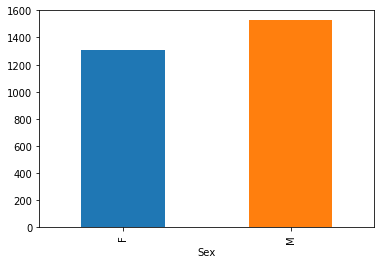

In [63]:
# Count by sex
Sex_count = abalone.groupby(['Sex'])['Sex'].count()

Sex_count.plot.bar()

In [78]:
# Actual counts of male and female
Sex_counts = abalone.Sex.value_counts()
Sex_counts

M    1528
F    1307
Name: Sex, dtype: int64

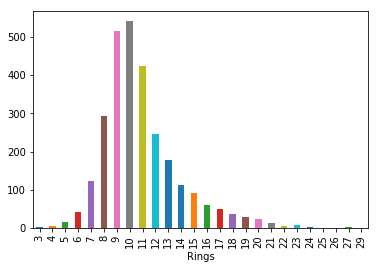

In [64]:
# count by rings
ring_count = abalone.groupby(['Rings'])['Rings'].count()

ring_count.plot.bar()

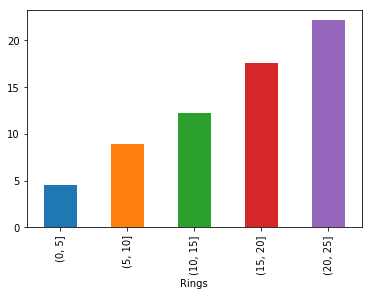

In [66]:
# ring bings
ring_bins = pd.cut(abalone['Rings'], np.arange(0, 30, 5))
ring_bins_histo = abalone.groupby(ring_bins).mean()
ring_bins_histo['Rings'].plot.bar()

In [68]:
abalone.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.978017,0.700392,0.921738,0.886616,0.888590,0.867281,0.311761
Diameter,0.978017,1.000000,0.708706,0.917171,0.873718,0.877102,0.877115,0.339400
Height,0.700392,0.708706,1.000000,0.716792,0.660641,0.686743,0.714636,0.334905
Whole Weight,0.921738,0.917171,0.716792,1.000000,0.956118,0.947327,0.929890,0.327539
Shucked Weight,0.886616,0.873718,0.660641,0.956118,1.000000,0.900791,0.822242,0.167702
Viscera Weight,0.888590,0.877102,0.686743,0.947327,0.900791,1.000000,0.854351,0.275209
Shell Weight,0.867281,0.877115,0.714636,0.929890,0.822242,0.854351,1.000000,0.465545
Rings,0.311761,0.339400,0.334905,0.327539,0.167702,0.275209,0.465545,1.000000


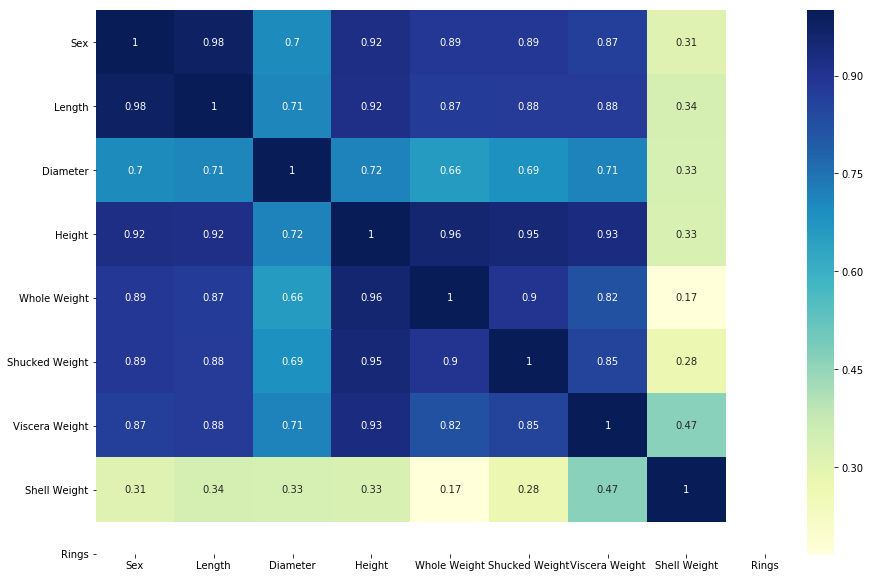

In [69]:
plt.subplots(figsize=(15,10))
sns.heatmap(abalone.corr(), xticklabels=abalone.columns.values, yticklabels=abalone.columns.values, annot=True, cmap="YlGnBu")
plt.show()

Shell weight has very low correlation with everthing
Diameter has relatively low correlation with things too.
Everything else has extremely high correlation

In [70]:
# drop shell weight for now, since it is so poorly correlated to sex
abalone = abalone.drop("Shell Weight", axis=1)

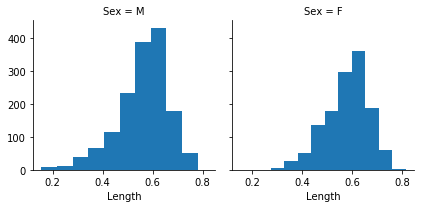

In [71]:
g = sns.FacetGrid(abalone, col="Sex")
g.map(plt.hist, "Length");
plt.show()

differentiate the dependent (y) and independent (x) variables

In [91]:
y = abalone["Sex"]
x = abalone.drop("Sex", axis=1)
x.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,20


## Implementing SVC

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [82]:


# Support Vector Classifier (SVM/SVC)

svc = SVC(gamma=0.0001)
svc.fit(x, y)
svc.score(x,y)

0.5389770723104056

Split into test and train, in order to fix/identify some overfitting

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [85]:
svc = SVC(gamma=0.0001)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
# having trained on the training data, how does it do when scored against the testing set?
svc.score(X_test,y_test)

0.532051282051282

## Logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
predictions = logmodel.predict(X_test)

In [89]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          F       0.53      0.16      0.25       438
          M       0.54      0.88      0.67       498

avg / total       0.54      0.54      0.47       936



In [90]:
print(confusion_matrix(y_test, predictions))

[[ 70 368]
 [ 62 436]]


## Implementing k-NN

In [93]:
from sklearn import neighbors, linear_model

# create new test and train sets from the x and y from before
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 5 nearest neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the model
knn_model_1 = knn.fit(X_train, y_train)

In [94]:
# Score it
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.548501


Lets test this with a few different values of n_neighbors

In [95]:
# 1 - 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn4 = neighbors.KNeighborsClassifier(n_neighbors = 4)
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn2 = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 1)

In [96]:
# Train for all 5 models
knn_model_5 = knn5.fit(X_train, y_train)
knn_model_4 = knn4.fit(X_train, y_train)
knn_model_3 = knn3.fit(X_train, y_train)
knn_model_2 = knn2.fit(X_train, y_train)
knn_model_1 = knn1.fit(X_train, y_train)

In [97]:
# Score all 5
print('k-NN n_neighbor = 5: %f' % knn_model_5.score(X_test, y_test))
print('k-NN n_neighbor = 4: %f' % knn_model_4.score(X_test, y_test))
print('k-NN n_neighbor = 3: %f' % knn_model_3.score(X_test, y_test))
print('k-NN n_neighbor = 2: %f' % knn_model_2.score(X_test, y_test))
print('k-NN n_neighbor = 1: %f' % knn_model_1.score(X_test, y_test))

k-NN n_neighbor = 5: 0.548501
k-NN n_neighbor = 4: 0.536155
k-NN n_neighbor = 3: 0.544974
k-NN n_neighbor = 2: 0.534392
k-NN n_neighbor = 1: 0.530864


It doesn't look like there is too much of a difference between this number of neighbors. Let's do it again but in bigger increments

In [98]:
# 1 - 5
knn100 = neighbors.KNeighborsClassifier(n_neighbors = 100)
knn80 = neighbors.KNeighborsClassifier(n_neighbors = 80)
knn60 = neighbors.KNeighborsClassifier(n_neighbors = 60)
knn40 = neighbors.KNeighborsClassifier(n_neighbors = 40)
knn20 = neighbors.KNeighborsClassifier(n_neighbors = 20)

In [99]:
# Train for all 5 models
knn_model_100 = knn100.fit(X_train, y_train)
knn_model_80 = knn80.fit(X_train, y_train)
knn_model_60 = knn60.fit(X_train, y_train)
knn_model_40 = knn40.fit(X_train, y_train)
knn_model_20 = knn20.fit(X_train, y_train)

In [100]:
# Score all 5
print('k-NN n_neighbor = 100: %f' % knn_model_100.score(X_test, y_test))
print('k-NN n_neighbor = 80: %f' % knn_model_80.score(X_test, y_test))
print('k-NN n_neighbor = 60: %f' % knn_model_60.score(X_test, y_test))
print('k-NN n_neighbor = 40: %f' % knn_model_40.score(X_test, y_test))
print('k-NN n_neighbor = 20: %f' % knn_model_20.score(X_test, y_test))

k-NN n_neighbor = 100: 0.530864
k-NN n_neighbor = 80: 0.543210
k-NN n_neighbor = 60: 0.534392
k-NN n_neighbor = 40: 0.541446
k-NN n_neighbor = 20: 0.543210
